In [1]:
!pip install gensim
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=2d00ca7a19e18e98be38317e21fd2676249e3cf6778d2c9619003775c6a7e3a9
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import wikipedia
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import re
import string
import seaborn as sns
from sklearn.manifold import MDS
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#Load the documents
document1 = wikipedia.page("lional messi").content
document2 = wikipedia.page("football").content

In [4]:
def clean_text(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation])
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return text_no_doublespace

In [5]:
cleaned_document1 = clean_text(document1)
cleaned_document2 = clean_text(document2)

In [8]:
#Tokenize the documents
tokenized_document1 = word_tokenize(cleaned_document1.lower())
tokenized_document2 = word_tokenize(cleaned_document2.lower())
print(" tokenized document1 ")
print(tokenized_document1)
print(len(tokenized_document1))
print(" ----------------------------------------------------------------------------- ")
print(" tokenized document2 ")
print(tokenized_document2)
print(len(tokenized_document2))
documents=[tokenized_document1,tokenized_document2]

 tokenized document1 
['lionel', 'andrés', 'messi', 'spanish', 'pronunciation', 'ljoˈnel', 'anˈdɾes', 'ˈmesi', 'born', 'june', 'also', 'known', 'as', 'leo', 'messi', 'is', 'an', 'argentine', 'professional', 'footballer', 'who', 'plays', 'as', 'a', 'forward', 'for', 'and', 'captains', 'both', 'major', 'league', 'soccer', 'club', 'inter', 'miami', 'and', 'the', 'argentina', 'national', 'team', 'widely', 'regarded', 'as', 'one', 'of', 'the', 'greatest', 'players', 'of', 'all', 'time', 'messi', 'has', 'won', 'a', 'record', 'eight', 'ballon', 'dor', 'awards', 'and', 'a', 'record', 'six', 'european', 'golden', 'shoes', 'and', 'in', 'he', 'was', 'named', 'to', 'the', 'ballon', 'dor', 'dream', 'team', 'until', 'leaving', 'the', 'club', 'in', 'he', 'had', 'spent', 'his', 'entire', 'professional', 'career', 'with', 'barcelona', 'where', 'he', 'won', 'a', 'clubrecord', 'trophies', 'including', 'ten', 'la', 'liga', 'titles', 'seven', 'copa', 'del', 'rey', 'titles', 'and', 'the', 'uefa', 'champions

In [11]:
#Train Word2Vec models
model1 = Word2Vec(sentences=documents, vector_size=10, window=5, min_count=1, workers=4)
#model2 = Word2Vec([tokenized_document2], vector_size=10, window=5, min_count=1, workers=4)
model1.train(documents,total_examples=len(documents),epochs=100)
#Get word embeddings
word_embeddings_for_document1 = {word: model1.wv[word] for word in tokenized_document1}
#word_embeddings_for_document2 = {word: model2.wv[word] for word in tokenized_document2}

print(len(word_embeddings_for_document1))
#print(len(word_embeddings_for_document2))

3063


In [12]:
print("Word embedding 1")
for word,e in word_embeddings_for_document1.items():

  print(f"{word}: {e}")

  break

Word embedding 1
lionel: [ 0.04193779  0.18245444  0.23754756  0.27173984  0.13326105  0.47166783
  0.37530676  0.51875937 -0.6933986  -0.9670291 ]


In [13]:
word_embeddings_for_document1.keys()

dict_keys(['lionel', 'andrés', 'messi', 'spanish', 'pronunciation', 'ljoˈnel', 'anˈdɾes', 'ˈmesi', 'born', 'june', 'also', 'known', 'as', 'leo', 'is', 'an', 'argentine', 'professional', 'footballer', 'who', 'plays', 'a', 'forward', 'for', 'and', 'captains', 'both', 'major', 'league', 'soccer', 'club', 'inter', 'miami', 'the', 'argentina', 'national', 'team', 'widely', 'regarded', 'one', 'of', 'greatest', 'players', 'all', 'time', 'has', 'won', 'record', 'eight', 'ballon', 'dor', 'awards', 'six', 'european', 'golden', 'shoes', 'in', 'he', 'was', 'named', 'to', 'dream', 'until', 'leaving', 'had', 'spent', 'his', 'entire', 'career', 'with', 'barcelona', 'where', 'clubrecord', 'trophies', 'including', 'ten', 'la', 'liga', 'titles', 'seven', 'copa', 'del', 'rey', 'uefa', 'champions', 'four', 'times', 'country', 'américa', 'fifa', 'world', 'cup', 'prolific', 'goalscorer', 'creative', 'playmaker', 'holds', 'records', 'most', 'goals', 'hattricks', 'assists', 'international', 'by', 'south', 'am

In [14]:
#Convert word embeddings to vectors for similarity metrics
vectors1 = list(word_embeddings_for_document1.values())
#vectors2 = list(word_embeddings_for_document2.values())
len(vectors1)

3063

In [15]:
vectors1

[array([ 0.04193779,  0.18245444,  0.23754756,  0.27173984,  0.13326105,
         0.47166783,  0.37530676,  0.51875937, -0.6933986 , -0.9670291 ],
       dtype=float32),
 array([ 1.2104261 ,  1.1912494 , -0.80885786,  0.58119094,  0.24025089,
         1.8499821 , -0.1305209 ,  0.89815   , -1.3873152 , -1.646226  ],
       dtype=float32),
 array([ 3.9804306, -0.6040593,  0.8517469,  1.5591637, -0.8661352,
         1.5765513, -2.57016  ,  1.5093895, -2.4614923, -1.8094063],
       dtype=float32),
 array([-2.6131265 , -1.4861257 ,  3.7492816 , -0.28792605, -4.2536693 ,
         4.9189353 ,  0.02530338,  3.2760355 , -0.35689056, -4.086164  ],
       dtype=float32),
 array([-0.08538059,  0.15329318, -0.01653714,  0.2477284 ,  0.06398062,
         0.8806517 ,  0.2836215 ,  0.6631086 , -0.88481265, -1.3729076 ],
       dtype=float32),
 array([-0.09605061,  0.22348166, -0.01513771,  0.20757414,  0.05733116,
         0.7017699 ,  0.23842026,  0.78169674, -0.98110545, -1.6111493 ],
       dtype=

In [16]:
def jaccard_similarity(list1, list2):
    set1 = set(map(tuple, list1))
    set2 = set(map(tuple, list2))

    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))

    return float(intersection) / union

In [17]:
#Calculate cosine simlarity
cosine_similarities = cosine_similarity(vectors1, vectors1)
print(cosine_similarities.shape)
print('Cosine Similarity :')
print(cosine_similarities)

#Calculate jaccard simlarity
jaccard_similarities = jaccard_similarity(vectors1, vectors1)
print('Jaccard Similarity :')
print(jaccard_similarities)

#Calculate euclidean distance
euclidean_distances = euclidean_distances(vectors1, vectors1)
print(euclidean_distances.shape)
print('Euclidean Distance :')
print(euclidean_distances)



(3063, 3063)
Cosine Similarity :
[[ 1.          0.76846087  0.48051065 ...  0.4616345   0.27252963
   0.22292745]
 [ 0.76846087  1.0000001   0.6606181  ...  0.15890633 -0.20450853
   0.28696114]
 [ 0.48051065  0.6606181   0.99999994 ...  0.13497101 -0.34598666
   0.17898841]
 ...
 [ 0.4616345   0.15890633  0.13497101 ...  1.          0.29226893
   0.14180908]
 [ 0.27252963 -0.20450853 -0.34598666 ...  0.29226893  1.0000001
   0.15131158]
 [ 0.22292745  0.28696114  0.17898841 ...  0.14180908  0.15131158
   0.99999994]]
Jaccard Similarity :
1.0
(3063, 3063)
Euclidean Distance :
[[0.         2.6129642  5.8204355  ... 1.4154501  1.4529958  1.4646602 ]
 [2.6129642  0.         4.8388934  ... 3.5543234  3.624397   3.533306  ]
 [5.8204355  4.8388934  0.         ... 6.365804   6.4585156  6.359739  ]
 ...
 [1.4154501  3.5543234  6.365804   ... 0.         0.22955897 0.24135698]
 [1.4529958  3.624397   6.4585156  ... 0.22955897 0.         0.24129814]
 [1.4646602  3.533306   6.359739   ... 0.241356

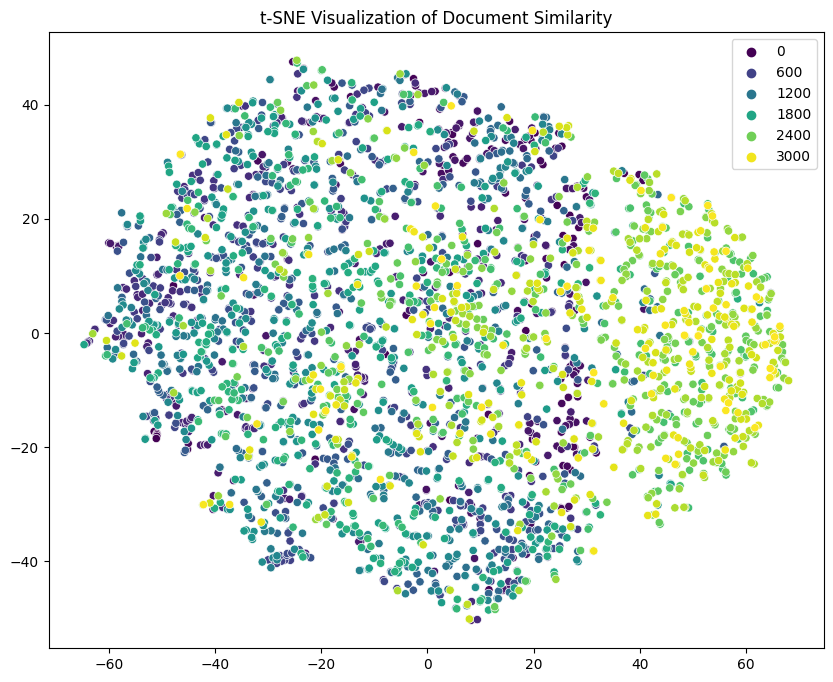

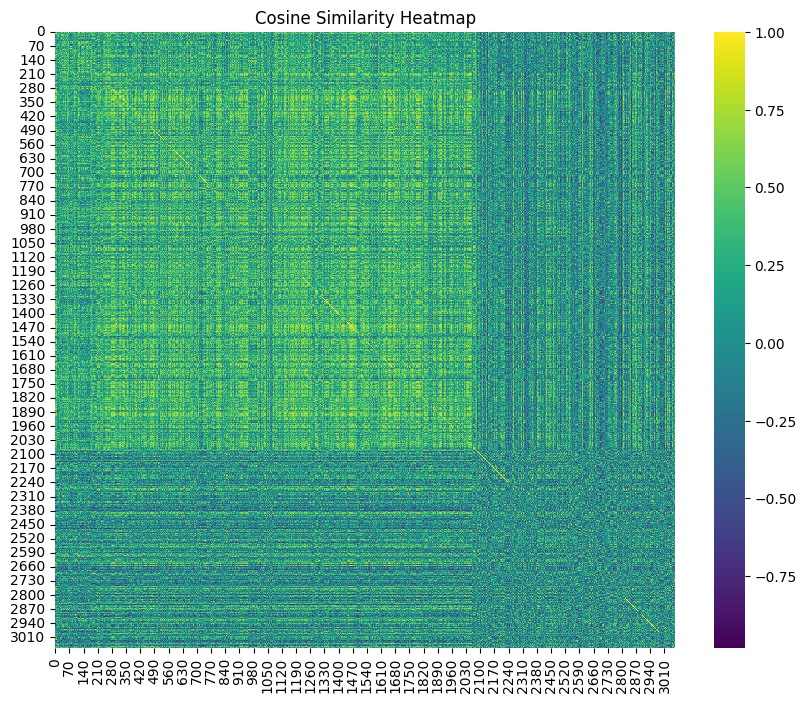

In [18]:
# Convert cosine similarity matrix to 2D representation using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(cosine_similarities)

# Visualize t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=range(len(tsne_result)), palette='viridis')
plt.title('t-SNE Visualization of Document Similarity')
plt.show()

# Heatmap visualization of cosine similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_similarities, cmap='viridis')
plt.title('Cosine Similarity Heatmap')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
import numpy as np

# Convert cosine similarity matrix to 2D representation using t-SNE
mds = MDS(n_components=2, random_state=42)
mds_result = mds.fit_transform(cosine_similarities)

# Visualize t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=mds_result[:, 0], y=mds_result[:, 1], hue=range(len(mds_result)), palette='viridis')
plt.title('MDS Visualization of Document Similarity')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
